# Challenge 3

In [3]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Import the titanic file. Name your dataset `titanic`.

In [4]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Explore the titanic dataset using Pandas dtypes

In [6]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [7]:
# your code here- numerical variable
titanic.select_dtypes('number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [8]:
#your code here- categorical variable
titanic.select_dtypes(exclude='number')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [9]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

<AxesSubplot:>

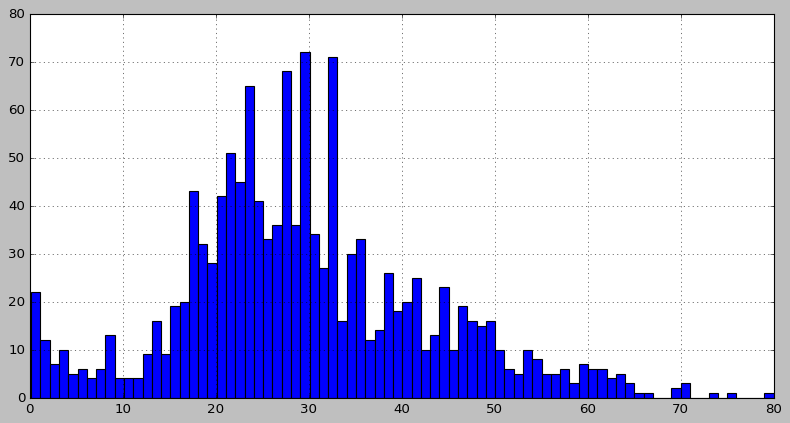

In [10]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12, 6))
titanic['Age'].hist(bins=80)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

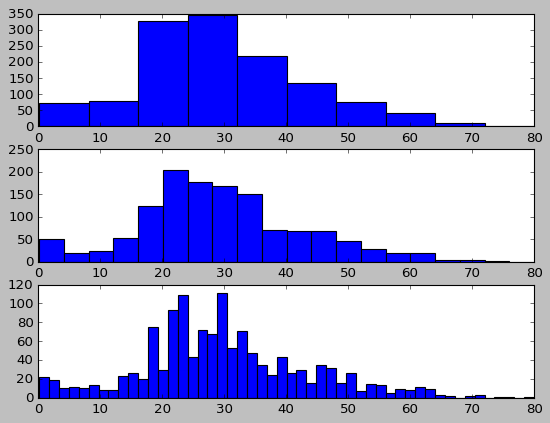

<Figure size 960x480 with 0 Axes>

In [11]:
# your code here
x = titanic['Age']
fig, ax = plt.subplots(3,1)
plt.figure(figsize=(12, 6))
ax[0].hist(x)
ax[1].hist(x, bins=20)
ax[2].hist(x, bins=50);

#### Whether the bin size affects your plot? Why?

### your comment here:
## Sí, porque hay poca representación de los datos en la gráfica si no hay suficientes barras

#### Use seaborn to show the distribution of the column `Age`

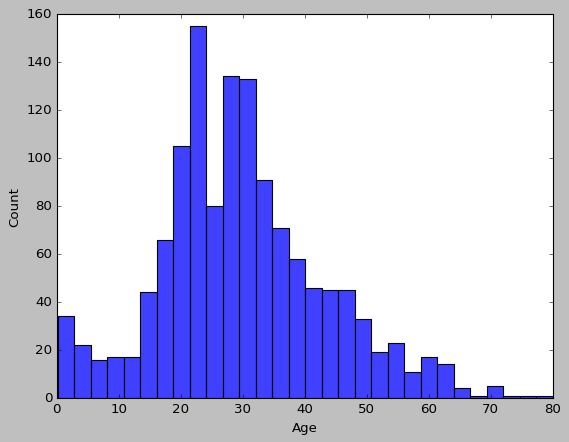

In [12]:
# your code here
sns.histplot(titanic['Age']);

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

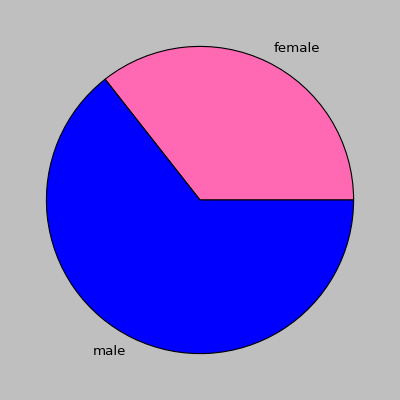

In [13]:
# your code here- 1st way
grupo = titanic.groupby('Gender').agg({'Gender':'count'})
x = ['female','male']
# grupo
colors = ['hotpink', 'blue']
plt.pie(grupo['Gender'], labels=x, colors=colors);
# titanic['Gender']

<AxesSubplot:xlabel='Gender', ylabel='Count'>

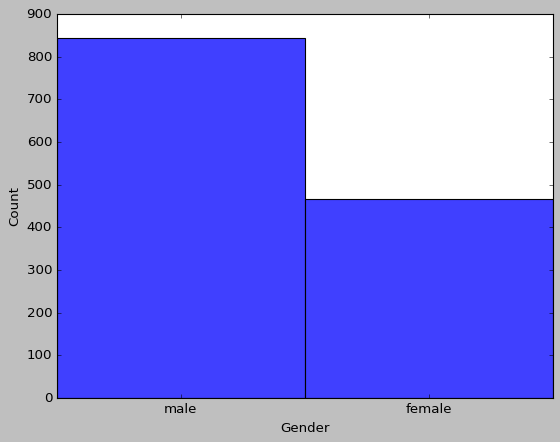

In [14]:
# your code here- 2nd way
sns.histplot(titanic['Gender'])

#### Use the appropriate plot to visualize the column `Pclass` 


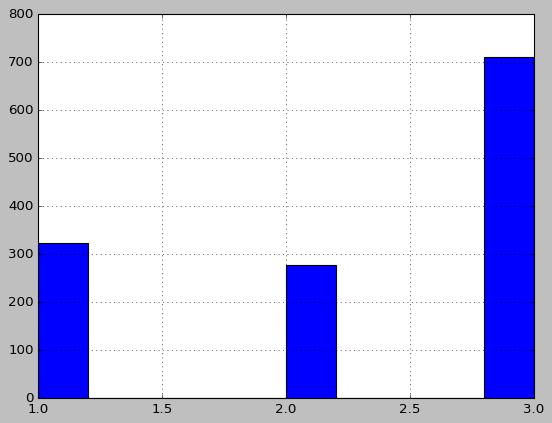

In [15]:
# your code here
titanic['Pclass'].hist();

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

<AxesSubplot:>

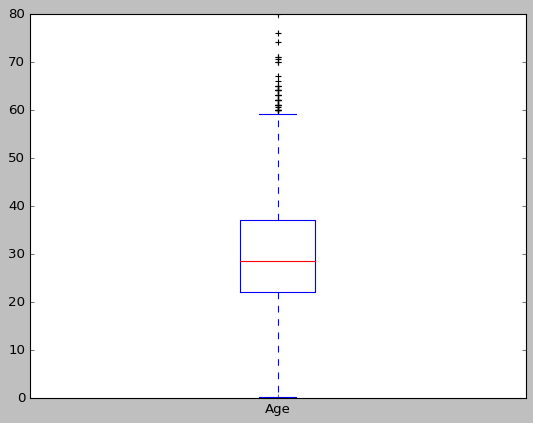

In [16]:
# your code here
# titanic.groupby('Age').agg({'Age':['min','max','mean','std']})
# pivote = pd.pivot_table(titanic, index='Age', aggfunc={'Age':['min','max','mean','std']})
# pivote
titanic['Age'].plot.box()

#### What does the previous plot tell you about the feature `Age`? Comment.

In [17]:
# your comment here


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

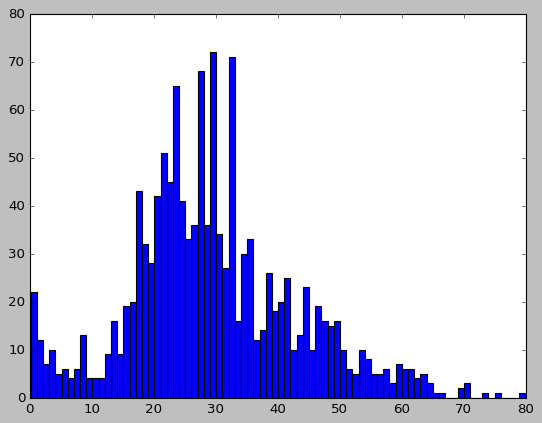

In [18]:
#your code here
plt.hist(titanic['Age'],bins=80);

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [19]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

,Fare,Age
Fare,1.000000,0.171355
Age,0.171355,1.000000


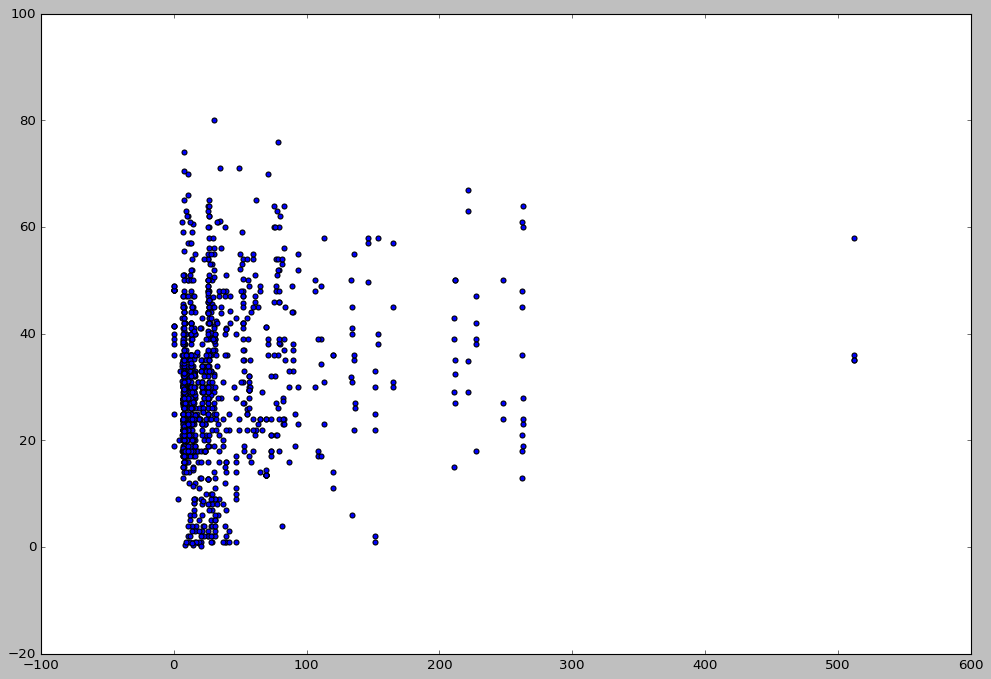

In [20]:
#your code-1st way
group = titanic[['Fare','Age']]
plt.figure(figsize=(15, 10))
plt.scatter(group['Fare'],group['Age'])
group.corr()

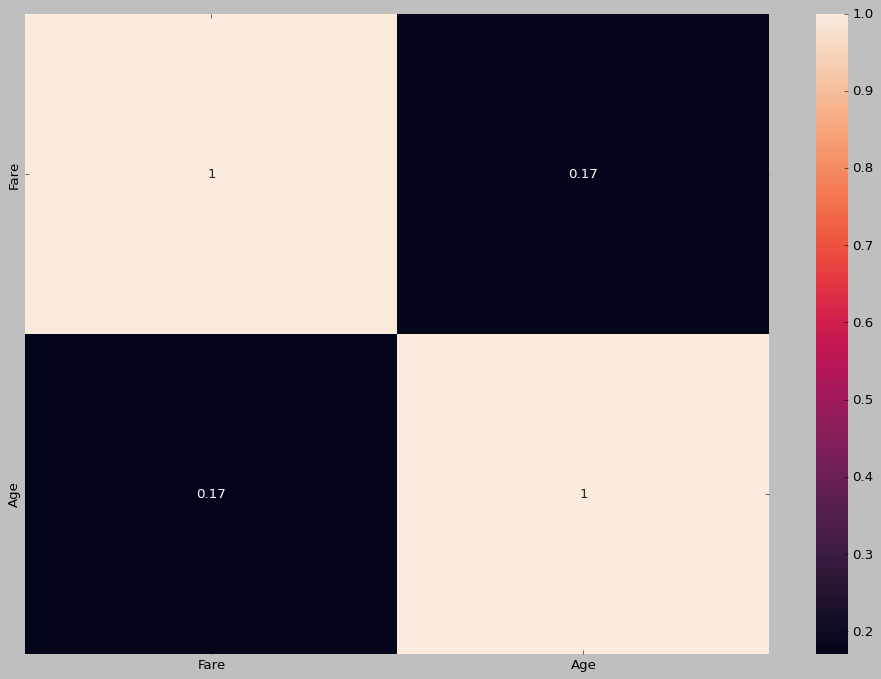

In [21]:
# your code-2nd way
plt.subplots(figsize=(15, 10))
sns.heatmap(group.corr(), annot=True);

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

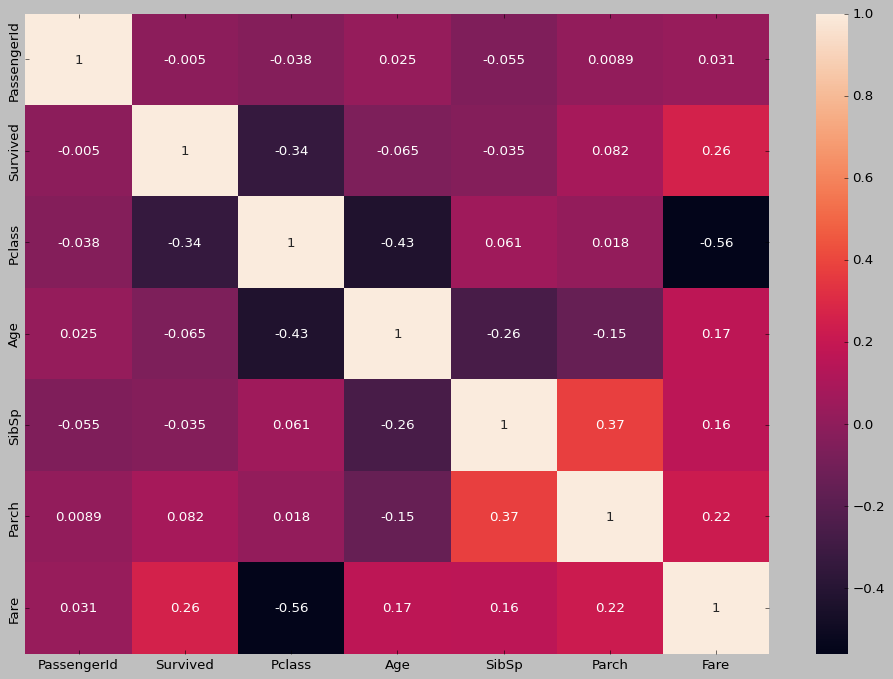

In [26]:
#your code here
plt.subplots(figsize=(15, 10))
sns.heatmap(titanic.corr(), annot=True);

#### According to the previous plot, what are the most correlated feature? Comment.

## your comment here:
## Fare/Pclass

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

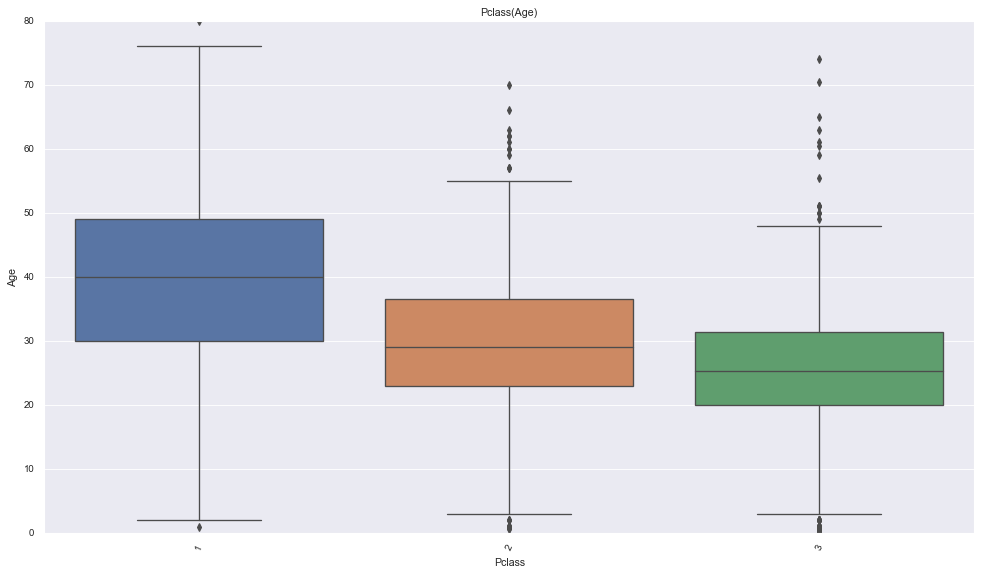

In [30]:
#your code here
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})

ax = sns.boxplot(y=titanic['Age'], x=titanic['Pclass'])

ax.set_title('Pclass(Age)')
ax.set(xlabel='Pclass', ylabel='Age')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65);

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


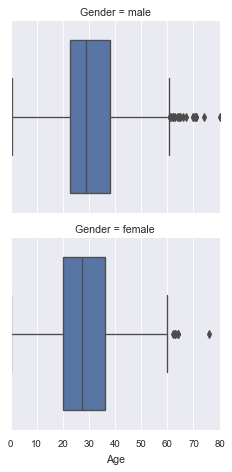

In [37]:
#your code here
# sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (15, 8)})


g = sns.FacetGrid(titanic, row="Gender")
g.map(sns.boxplot, 'Age');